# ¿Cuál es la mejor tarifa?

La empresa Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.


## Inicialización

In [8]:
# Iniciamos cargando las librerias necesarias
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
from scipy.stats import ttest_ind




## Cargar datos

In [9]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('megaline_users.csv')
plans = pd.read_csv('megaline_plans.csv')
msns = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
calls = pd.read_csv('megaline_calls.csv')




## Preparar los datos

Exploraremos cada una de nuestras tablas y que tipo de datos contienen.

In [10]:
#USERS
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
#Calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [12]:
#Mensajes
msns.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
#Internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [14]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Tarifas

In [15]:
#Verificamos los datos que contiene nuestra tabla
plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


## Corregir datos

In [17]:
#Se requiere una conversión de mb a gb para calcular el cobro por exceso en el tráfico de datos.

## Enriquecer los datos

In [18]:
#Sin datos que agregar

## Usuarios/as

In [19]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
# Imprime una muestra de datos para usuarios
users_sample = users.sample(n = 15)
users_sample

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
444,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,NaN
226,1226,Denver,Harrell,64,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-15,ultimate,NaN
110,1110,Anderson,Cotton,65,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-20,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
368,1368,Enola,Ray,60,"Pittsburgh, PA MSA",2018-05-20,ultimate,NaN
64,1064,Gerardo,Ashley,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-03,surf,NaN
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN
219,1219,Gavin,Keller,51,"Detroit-Warren-Dearborn, MI MSA",2018-05-14,surf,NaN
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaN


Los tipos de datos son correctos, unicamente podemos convertir los datos que son fechas de object a datatime.

### Corregir los datos

In [21]:
#Cambiamos los tipos de datos que contiene fechas
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [22]:
#Verificamos la corrección
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Nos encontramos con valores nulos en la variable churn_date, lo que nos dice que son usuarios que no han cancelados sus sucrpción, usuarios activos. Los valores nulos en esta columna no afectan nuestro análisis.

In [23]:
#Verificamos si no hay id de uduarios repetidos
users['user_id'].duplicated().sum()

0

### Enriquecer los datos

Aplicamos un corte de mes para los análisis que se necesitarán adelante. 

## Llamadas

In [25]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [26]:
calls['id'].duplicated().sum()

0

In [27]:
# Imprime una muestra de datos para las llamadas
calls_sample = calls.sample(n = 15)
calls_sample


,id,user_id,call_date,duration
105293,1370_614,1370,2018-09-17,2.81
124184,1439_52,1439,2018-08-21,1.26
52391,1187_584,1187,2018-12-08,16.58
127215,1455_37,1455,2018-11-22,1.17
73691,1261_465,1261,2018-11-15,7.93
19868,1076_233,1076,2018-09-24,0.00
103929,1366_138,1366,2018-09-12,12.50
36188,1138_141,1138,2018-11-05,0.00
344,1002_350,1002,2018-12-30,6.12
25251,1097_354,1097,2018-10-18,7.20


Podemos modificar el tipo de datos en la fecha, el resto de datos es el adecuado. En la duración de llamadas nos encontramos con algunos 0, podemos deducir que en ese periodo no se realizaron llamadas.

### Corregir los datos

In [28]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [29]:
calls["month"] = calls["call_date"].dt.to_period("M").dt.start_time

## Mensajes

In [30]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
msns.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
msns['id'].duplicated().sum()

0

In [32]:
# Imprime una muestra de datos para los mensajes
msns_sample = msns.sample(n = 15)
msns_sample


,id,user_id,message_date
1515,1015_167,1015,2018-12-19
63579,1405_292,1405,2018-11-19
27286,1167_243,1167,2018-12-09
11119,1077_390,1077,2018-12-22
75031,1489_106,1489,2018-12-25
48983,1327_76,1327,2018-12-20
31377,1195_244,1195,2018-11-29
71052,1462_160,1462,2018-11-12
52622,1336_633,1336,2018-07-24
58926,1374_100,1374,2018-10-04


Modificaremos el tipo de datos de la fecha.

### Corregir los datos

In [33]:
msns['message_date'] = pd.to_datetime(msns['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [34]:
msns["month"] = msns["message_date"].dt.to_period("M").dt.start_time

## Internet

In [35]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [36]:
internet['id'].duplicated().sum()

0

In [37]:
internet_sample = internet.sample(n = 15)
internet_sample


,id,user_id,session_date,mb_used
84576,1394_118,1394,2018-10-07,653.92
64012,1293_572,1293,2018-12-11,408.64
37452,1169_319,1169,2018-12-10,430.18
48358,1215_80,1215,2018-10-24,917.58
56851,1257_118,1257,2018-10-04,66.72
79361,1370_0,1370,2018-11-25,287.78
14748,1067_69,1067,2018-11-19,210.83
48797,1217_137,1217,2018-10-06,200.55
6436,1036_209,1036,2018-07-25,601.83
45500,1201_366,1201,2018-11-14,565.38


Modificamos el tipo de datos de fecha. Debido a que el tráfico de datos se maneja en mb y el cobro es en gb, en los calculos posteriores vamos a hacer la conversión gb = mb*1024, y al momento de hacer el cobro consideramos el entero posterior. De modo que si tenemos un decimal redondeamos al entero siguiente.

### Corregir los datos

In [38]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [39]:
internet["month"] = internet["session_date"].dt.to_period("M").dt.start_time

## Estudiar las condiciones de las tarifas

Imprimiremos las condiciones de las tarifas para tenerlos presentes en los siguientes pasos.

In [40]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Agregaremos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. 

In [41]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_by_month = calls.groupby(['user_id', 'month']).agg( #agrupamos en condición de usuario y mes
    total_calls=('duration', 'count'), #hacemos un conteo de las llamadas
    total_minutes=('duration', 'sum') #sumamos los minutos para calcular los minutos usados por usuario al mes
).reset_index()

calls_by_month.head(10)

,user_id,month,total_calls,total_minutes
0,1000,2018-12-01,16,116.83
1,1001,2018-08-01,27,171.14
2,1001,2018-09-01,49,297.69
3,1001,2018-10-01,65,374.11
4,1001,2018-11-01,64,404.59
5,1001,2018-12-01,56,392.93
6,1002,2018-10-01,11,54.13
7,1002,2018-11-01,55,359.76
8,1002,2018-12-01,47,363.24
9,1003,2018-12-01,149,1041.00


In [42]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
msns_by_month = msns.groupby(['user_id', 'month']).agg( #agrupamos en condición de usuario y mes
    total_msns=('id', 'count'), #hacemos un conteo de las llamadas
).reset_index()

msns_by_month.head(10)


,user_id,month,total_msns
0,1000,2018-12-01,11
1,1001,2018-08-01,30
2,1001,2018-09-01,44
3,1001,2018-10-01,53
4,1001,2018-11-01,36
5,1001,2018-12-01,44
6,1002,2018-10-01,15
7,1002,2018-11-01,32
8,1002,2018-12-01,41
9,1003,2018-12-01,50


In [43]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_by_month = internet.groupby(['user_id', 'month']).agg(
    total_mb=('mb_used', 'sum')
).reset_index()

internet_by_month.head()


,user_id,month,total_mb
0,1000,2018-12-01,1901.47
1,1001,2018-08-01,6919.15
2,1001,2018-09-01,13314.82
3,1001,2018-10-01,22330.49
4,1001,2018-11-01,18504.30


Juntaremos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [44]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
combi = pd.merge(
    calls_by_month,
    msns_by_month,
    on = ['user_id', 'month'],
    how = 'outer') #el como outer funciona para no excluir los meses en los que solo hay llamadas o solo mensajes

#hacemos otra combinación entre la tabla que incluye llamadas y mensajes con la de internet
combined = pd.merge(
    internet_by_month,
    combi,
    on = ['user_id', 'month'],
    how = 'outer')

fill_cols = ['total_calls', 'total_minutes', 'total_mb', 'total_msns'] #rellenamos valores nulos

for col in fill_cols:
    combined[col].fillna(0, inplace = True)

combined.head()



C:\Users\erika\AppData\Local\Temp\ipykernel_9636\1965876455.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined[col].fillna(0, inplace = True)


,user_id,month,total_mb,total_calls,total_minutes,total_msns
0,1000,2018-12-01,1901.47,16.0,116.83,11.0
1,1001,2018-08-01,6919.15,27.0,171.14,30.0
2,1001,2018-09-01,13314.82,49.0,297.69,44.0
3,1001,2018-10-01,22330.49,65.0,374.11,53.0
4,1001,2018-11-01,18504.30,64.0,404.59,36.0


In [45]:
# Añade la información de la tarifa
combined_user = pd.merge(
    combined,
    users,
    on = 'user_id',
    how ='outer')

combined_user_plan = pd.merge(
    combined_user,
    plans,
    left_on = 'plan',
    right_on = 'plan_name',
    how='outer')

combined_user_plan.sample(n=10)


,user_id,month,total_mb,total_calls,total_minutes,total_msns,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
2041,1347,2018-11-01,23007.19,62.0,399.22,71.0,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
948,1293,2018-09-01,32271.60,80.0,500.87,96.0,Lanny,Nolan,23,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2007,1304,2018-12-01,23251.89,65.0,507.47,59.0,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1099,1334,2018-12-01,14517.44,141.0,1009.95,17.0,Donovan,Horton,34,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1175,1357,2018-08-01,19805.69,77.0,529.02,50.0,Ria,Beach,61,"Baton Rouge, LA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1335,1402,2018-12-01,15993.80,56.0,372.04,0.0,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,surf,2018-12-26,50,15360,500,20,10,0.03,0.03,surf
674,1203,2018-05-01,13325.49,75.0,554.96,63.0,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
1492,1470,2018-12-01,0.00,78.0,560.44,153.0,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2283,1478,2018-09-01,19428.57,61.0,421.54,17.0,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
184,1066,2018-10-01,21231.79,56.0,387.07,36.0,Ariel,Woods,61,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


Calculamos los ingresos mensuales por usuario, restando el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplicamos el resultado por las tarifas y la sumamos al costo del plan.

In [46]:
# Calcula el ingreso mensual para cada usuario
gral_data = combined_user_plan.copy() #renombramos la tabla conjunta y almacenamos una copia para simplicidad

#exceso de consumo de internet
gral_data["excess_mb"] = gral_data["total_mb"] - gral_data["mb_per_month_included"] #establecemos los mb excedidos al hacer una resta entre lo gastado y lo incluido
gral_data.loc[gral_data["excess_mb"] < 0, "excess_mb"] = 0 #como hay usuarios que no consumieron todos sus mb y tendrán resultados negativos, estableceremos esta condición.
gral_data["excess_gb"] = gral_data["excess_mb"]/1024 #convertimos mb a gb
gral_data["excess_gb"] = np.ceil(gral_data["excess_gb"]) #usamos la función techo para ir al proximo numero entero
gral_data["income_gb"] = gral_data["excess_gb"] * gral_data["usd_per_gb"] #establecemos el cobro por el exceso de datos

#exceso de minutos en llamadas
gral_data["excess_minutes"] = gral_data["total_minutes"] - gral_data["minutes_included"] #encontramos los minutos excedidos del plan
gral_data.loc[gral_data["excess_minutes"] < 0, "excess_minutes"] = 0 #descartamos valores negativos
gral_data["excess_minutes"] = np.ceil(gral_data["excess_minutes"]) #redondeamos los segundos al siguiente minuto
gral_data["income_calls"] = gral_data["excess_minutes"] * gral_data["usd_per_minute"] #establecemos el cobro por elexceso de minutis

#exceso de mensajes
gral_data["excess_msns"] = gral_data["total_msns"] - gral_data["messages_included"] #encontramos los mensajes excedidos del plan
gral_data.loc[gral_data["excess_msns"] < 0, "excess_msns"] = 0 #descartamos valores negativos
gral_data["income_msns"] = gral_data["excess_msns"] * gral_data["usd_per_message"] #establecemos el cobro por mensajes excedidos

gral_data['income'] = gral_data['usd_monthly_pay'] #creamos la columna de ingresos considerando el monto del plan
gral_data['income'] += (gral_data["income_gb"] + gral_data["income_calls"] + gral_data["income_msns"]) #sumamos los cobros extras al pago mensual

gral_data[["user_id", "plan", "month", "income", "excess_gb", "excess_minutes", "excess_msns"]].sample(n = 25)


,user_id,plan,month,income,excess_gb,excess_minutes,excess_msns
906,1280,surf,2018-10-01,41.83,2.0,55.0,6.0
280,1090,surf,2018-12-01,20.00,0.0,0.0,0.0
190,1067,surf,2018-12-01,30.00,1.0,0.0,0.0
253,1081,surf,2018-11-01,20.00,0.0,0.0,0.0
904,1280,surf,2018-08-01,20.45,0.0,0.0,15.0
2183,1432,ultimate,2018-10-01,70.00,0.0,0.0,0.0
1286,1387,surf,2018-11-01,63.63,4.0,121.0,0.0
315,1099,surf,2018-12-01,30.36,1.0,12.0,0.0
1392,1421,surf,2018-10-01,20.00,0.0,0.0,0.0
1003,1312,surf,2018-10-01,80.00,6.0,0.0,0.0


## Estudia el comportamiento de usuario

### Llamadas

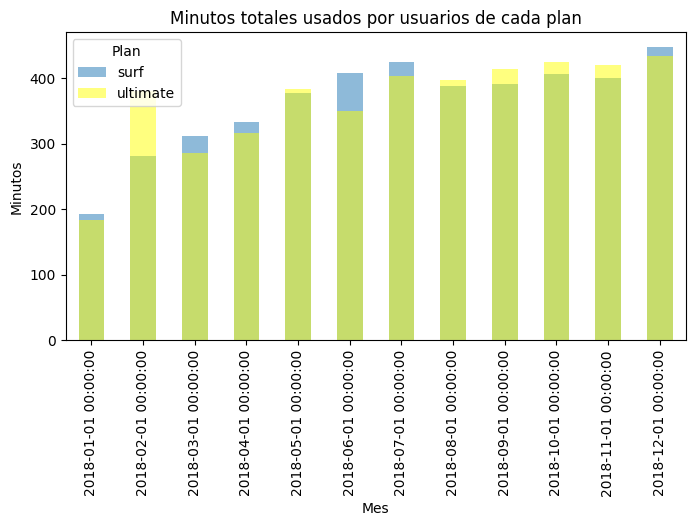

In [47]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#dividimos el dataframe en función de los planes
df_surf = gral_data.query('plan == "surf"')
df_ultimate = gral_data.query("plan == 'ultimate'")


gral_data_prom_s = df_surf.groupby('month')["total_minutes"].mean()
gral_data_prom_u = df_ultimate.groupby('month')["total_minutes"].mean()
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando la el total de minutos.
gral_data_prom_s.plot(kind='bar', x='month', y='total_minutes', alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
gral_data_prom_u.plot(kind='bar', x='month', y='total_minutes', alpha = 0.5, color = "yellow", label = 'ultimate')
plt.legend(title="Plan")
plt.xlabel("Mes")
plt.ylabel("Minutos")
plt.title("Minutos totales usados por usuarios de cada plan")
plt.show()


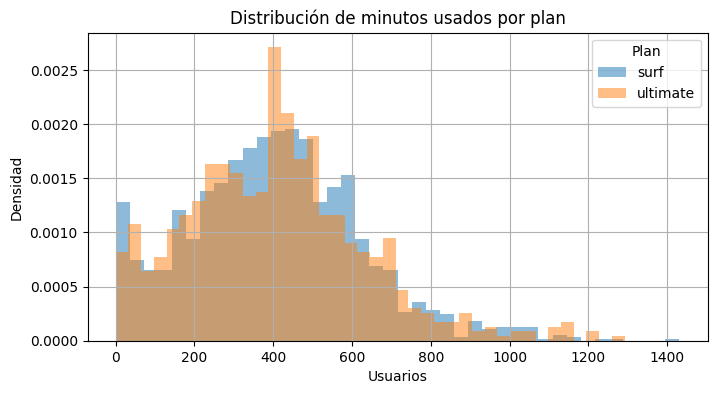

In [48]:
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando la frecuencia y no los usuarios ya que hay menos usuarios con ultimate plan.
df_surf['total_minutes'].hist(bins=40, density = True, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['total_minutes'].hist(bins=40, density = True, alpha = 0.5, label = 'ultimate')
plt.xlabel("Usuarios")
plt.ylabel("Densidad")
plt.legend(title="Plan")
plt.title("Distribución de minutos usados por plan")
plt.show()

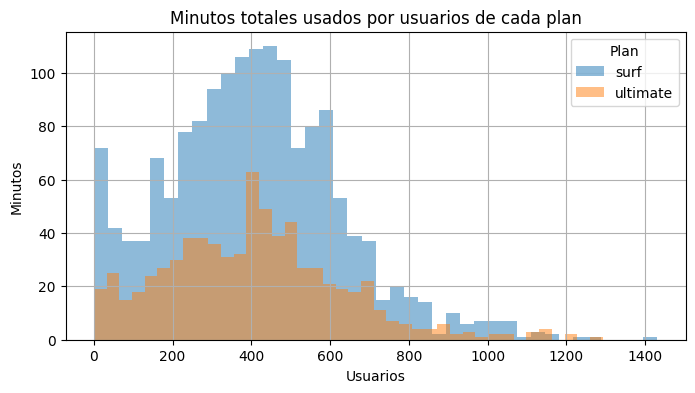

In [49]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando la el total de minutos.
df_surf['total_minutes'].hist(bins=40, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['total_minutes'].hist(bins=40, alpha = 0.5, label = 'ultimate')
plt.legend(title="Plan")
plt.xlabel("Usuarios")
plt.ylabel("Minutos")
plt.title("Minutos totales usados por usuarios de cada plan")
plt.show()


In [50]:
# Calcula la media y la varianza de la duración mensual de llamadas.

#usamos la función mean y var
print("Promedio de duración mensual de llamadas por usuarios del plan Surf:", df_surf["total_minutes"].mean())
print("Varianza de duración mensual de llamadas por usuarios del plan Surf:", np.var(df_surf["total_minutes"]))
print("")
print("Promedio de duración mensual de llamadas por usuarios del plan Ultimate:", df_ultimate["total_minutes"].mean())
print("Varianza de duración mensual de llamadas por usuarios del plan Ultimate:", np.var(df_ultimate["total_minutes"]))

Promedio de duración mensual de llamadas por usuarios del plan Surf: 404.76239033693577
Varianza de duración mensual de llamadas por usuarios del plan Surf: 49103.8683332564

Promedio de duración mensual de llamadas por usuarios del plan Ultimate: 406.19308333333333
Varianza de duración mensual de llamadas por usuarios del plan Ultimate: 51569.24783077083


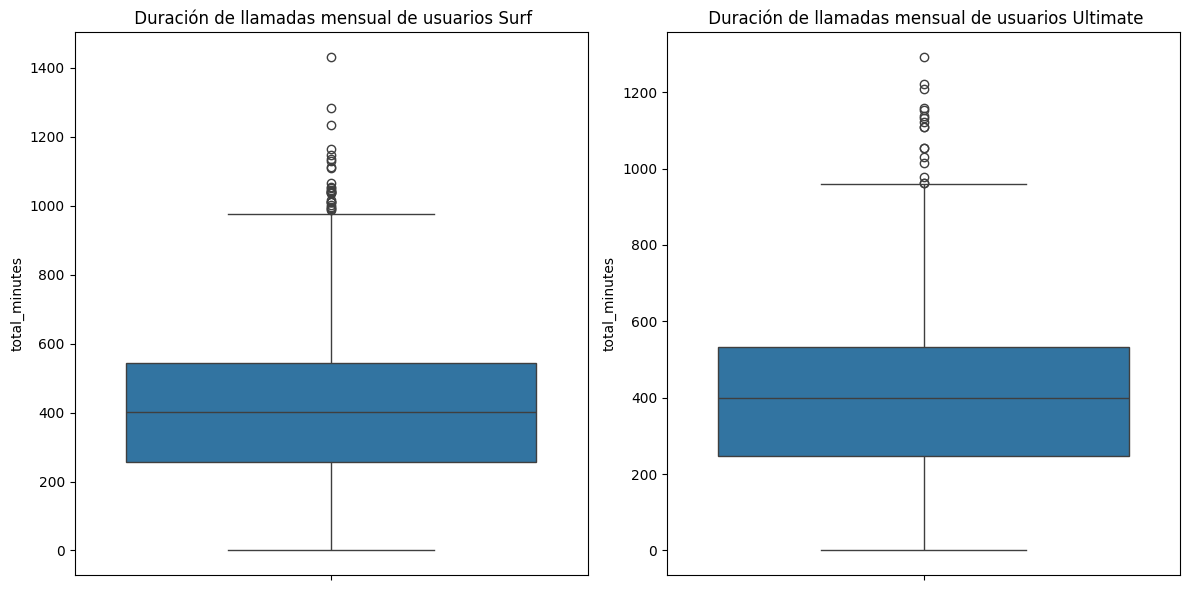

In [51]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
#haremos ambos diagramas en una sola figura

#Creamos la figura y sus ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de caja para 'Surf' en el primer subgráfico
sns.boxplot(data=df_surf, y='total_minutes', ax=axes[0])
axes[0].set_title(' Duración de llamadas mensual de usuarios Surf')

# Gráfico de caja para 'Ultimate' en el segundo subgráfico
sns.boxplot(data=df_ultimate, y='total_minutes', ax=axes[1])
axes[1].set_title(' Duración de llamadas mensual de usuarios Ultimate')

# Mostrar la figura
plt.tight_layout()
plt.show()

A simple vista podemos deducir que el comportamiento en la duración de llamadas al mes no difiere significativamente, debido a que graficamente los usuarios de ambos planes tienen una forma similar. Fuera de los valores atípicos, los usuarios de ambos planes tienen un consumo de llamadas similar.

### Mensajes

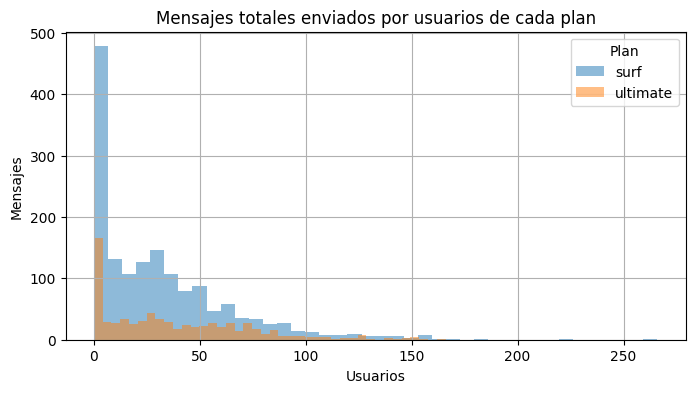

In [52]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando el total de mensajes.
df_surf['total_msns'].hist(bins=40, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['total_msns'].hist(bins=40, alpha = 0.5, label = 'ultimate')
plt.legend(title="Plan")
plt.xlabel("Usuarios")
plt.ylabel("Mensajes")
plt.title("Mensajes totales enviados por usuarios de cada plan")
plt.show()


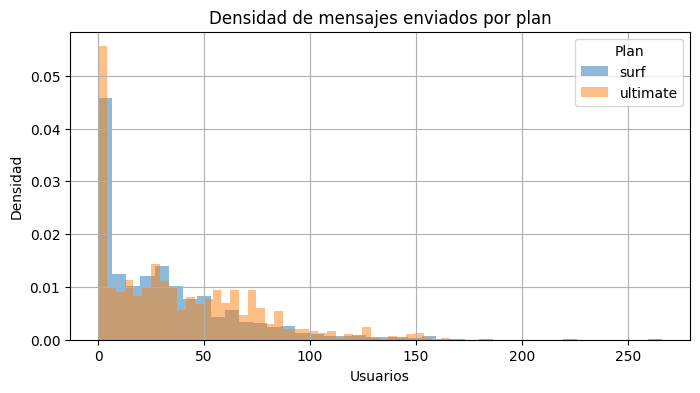

In [53]:
#Haremos el análisis con la densidad
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando la frecuencia y no los usuarios ya que hay menos usuarios con ultimate plan.
df_surf['total_msns'].hist(bins=40, density = True, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['total_msns'].hist(bins=40, density = True, alpha = 0.5, label = 'ultimate')
plt.xlabel("Usuarios")
plt.ylabel("Densidad")
plt.legend(title="Plan")
plt.title("Densidad de mensajes enviados por plan")
plt.show()


In [54]:
#usamos la función mean y var
print("Promedio de mensajes enviados por usuarios del plan Surf:", df_surf["total_msns"].mean())
print("Varianza de mensajes enviados por usuarios del plan Surf:", np.var(df_surf["total_msns"]))
print("")
print("Promedio de mensajes enviados por usuarios del plan Ultimate:", df_ultimate["total_msns"].mean())
print("Varianza de mensajes enviados por usuarios del plan Ultimate:", np.var(df_ultimate["total_msns"]))

Promedio de mensajes enviados por usuarios del plan Surf: 31.15956770502225
Varianza de mensajes enviados por usuarios del plan Surf: 1126.0082317266622

Promedio de mensajes enviados por usuarios del plan Ultimate: 37.55138888888889
Varianza de mensajes enviados por usuarios del plan Ultimate: 1207.0779147376545


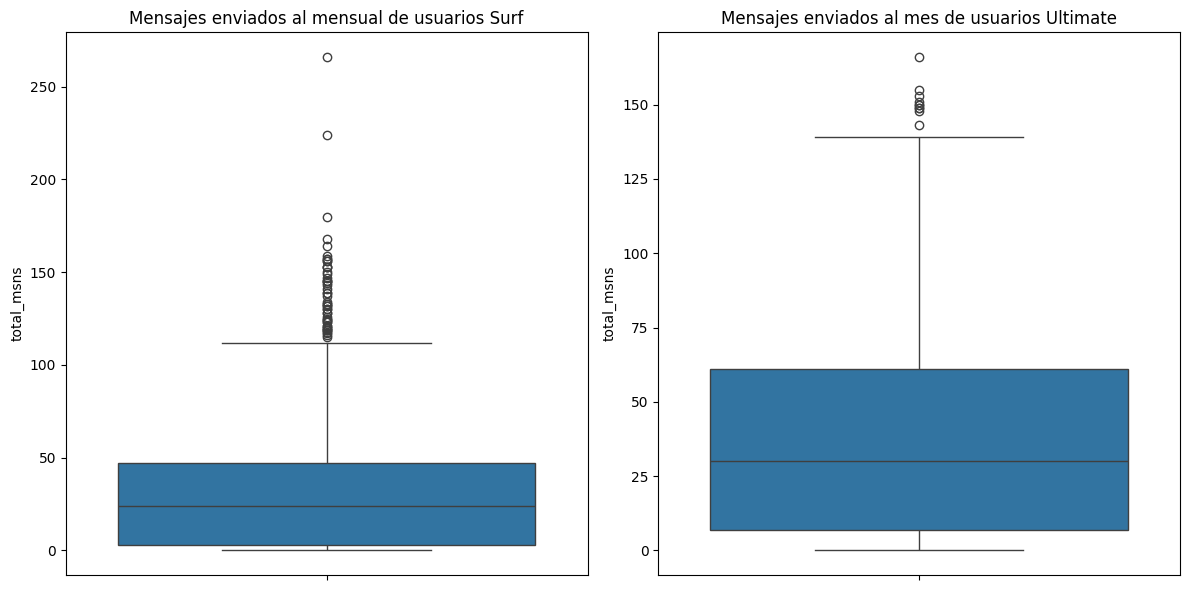

In [55]:
#Creamos la figura y sus ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de caja para 'Surf' en el primer subgráfico
sns.boxplot(data=df_surf, y='total_msns', ax=axes[0])
axes[0].set_title('Mensajes enviados al mensual de usuarios Surf')

# Gráfico de caja para 'Ultimate' en el segundo subgráfico
sns.boxplot(data=df_ultimate, y='total_msns', ax=axes[1])
axes[1].set_title('Mensajes enviados al mes de usuarios Ultimate')

# Mostrar la figura
plt.tight_layout()
plt.show()

A simple vista los usuarios de ambas tarifas tienen un comportamiento similar en cuanto al envío de mensajes, sin embargo, en el gráfico de caja se obserba que los usuarios de Ultimate envian mayor cantidad de mensajes en promedio.

### Internet

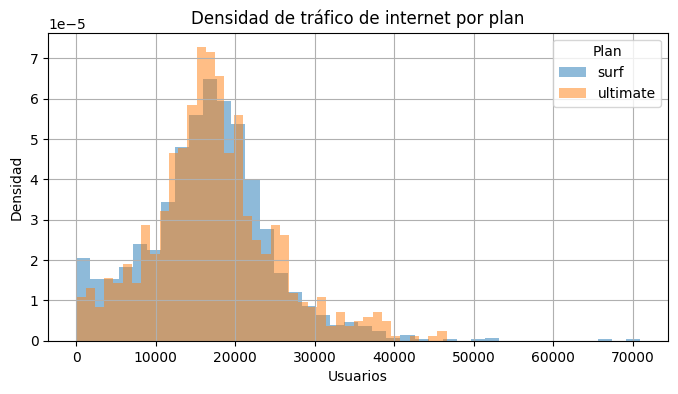

In [56]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
#Haremos el análisis con la densidad
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando la frecuencia y no los usuarios ya que hay menos usuarios con ultimate plan.
df_surf['total_mb'].hist(bins=40, density = True, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['total_mb'].hist(bins=40, density = True, alpha = 0.5, label = 'ultimate')
plt.xlabel("Usuarios")
plt.ylabel("Densidad")
plt.legend(title="Plan")
plt.title("Densidad de tráfico de internet por plan")
plt.show()


In [57]:
#usamos la función mean y var
print("Promedio de consumo de datos por usuarios del plan Surf:", df_surf["total_mb"].mean())
print("Varianza de consumo de datos por usuarios del plan Surf:", np.var(df_surf["total_mb"]))
print("")
print("Promedio de consumo de datos por usuarios del plan Ultimate:", df_ultimate["total_mb"].mean())
print("Varianza de consumo de datos por usuarios del plan Ultimate:", np.var(df_ultimate["total_mb"]))

Promedio de consumo de datos por usuarios del plan Surf: 16558.283490146216
Varianza de consumo de datos por usuarios del plan Surf: 64175571.68301331

Promedio de consumo de datos por usuarios del plan Ultimate: 17214.699694444447
Varianza de consumo de datos por usuarios del plan Ultimate: 61566665.138686284


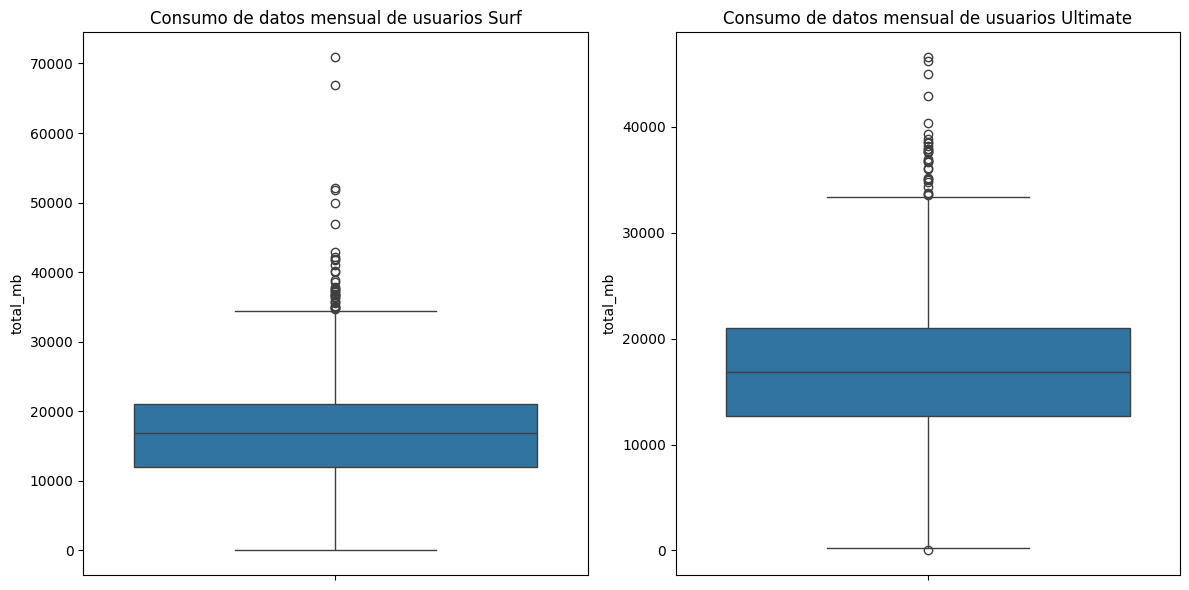

In [58]:
#Creamos la figura y sus ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de caja para 'Surf' en el primer subgráfico
sns.boxplot(data=df_surf, y='total_mb', ax=axes[0])
axes[0].set_title('Consumo de datos mensual de usuarios Surf')

# Gráfico de caja para 'Ultimate' en el segundo subgráfico
sns.boxplot(data=df_ultimate, y='total_mb', ax=axes[1])
axes[1].set_title('Consumo de datos mensual de usuarios Ultimate')

# Mostrar la figura
plt.tight_layout()
plt.show()

Los histogramas muestran un comportamiento similar en los usuarios de mabos planes, sin embargo, se puede observar en los gráficos de caja que los usuatios de Surf tienen valores atípicos más dispersos que los usuarios de Ultimate.

## Ingreso

Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.

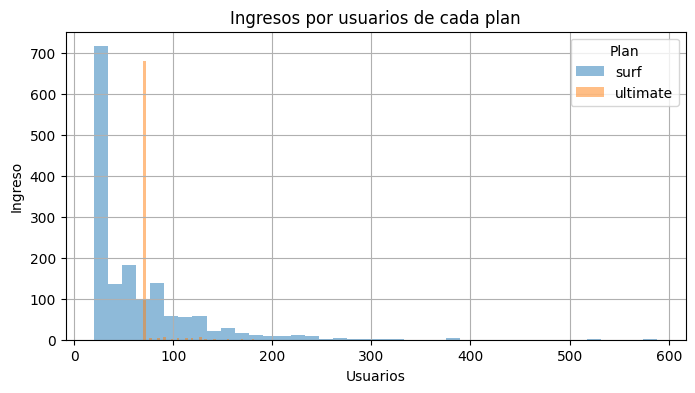

In [59]:
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando el total de mensajes.
df_surf['income'].hist(bins=40, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['income'].hist(bins=40, alpha = 0.5, label = 'ultimate')
plt.legend(title="Plan")
plt.xlabel("Usuarios")
plt.ylabel("Ingreso")
plt.title("Ingresos por usuarios de cada plan")
plt.show()


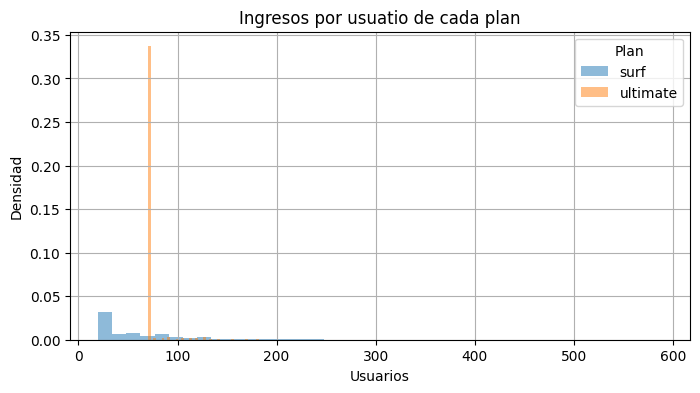

In [60]:
#Por densidad
plt.figure(figsize=(8,4)) #graficamos en conjunto ambas tarifas, considerando el total de mensajes.
df_surf['income'].hist(bins=40, density=True, alpha = 0.5, label = "surf" ) #un histograma compartido nos permitirá una mejor comparación
df_ultimate['income'].hist(bins=40, density=True, alpha = 0.5, label = 'ultimate')
plt.legend(title="Plan")
plt.xlabel("Usuarios")
plt.ylabel("Densidad")
plt.title("Ingresos por usuatio de cada plan")
plt.show()


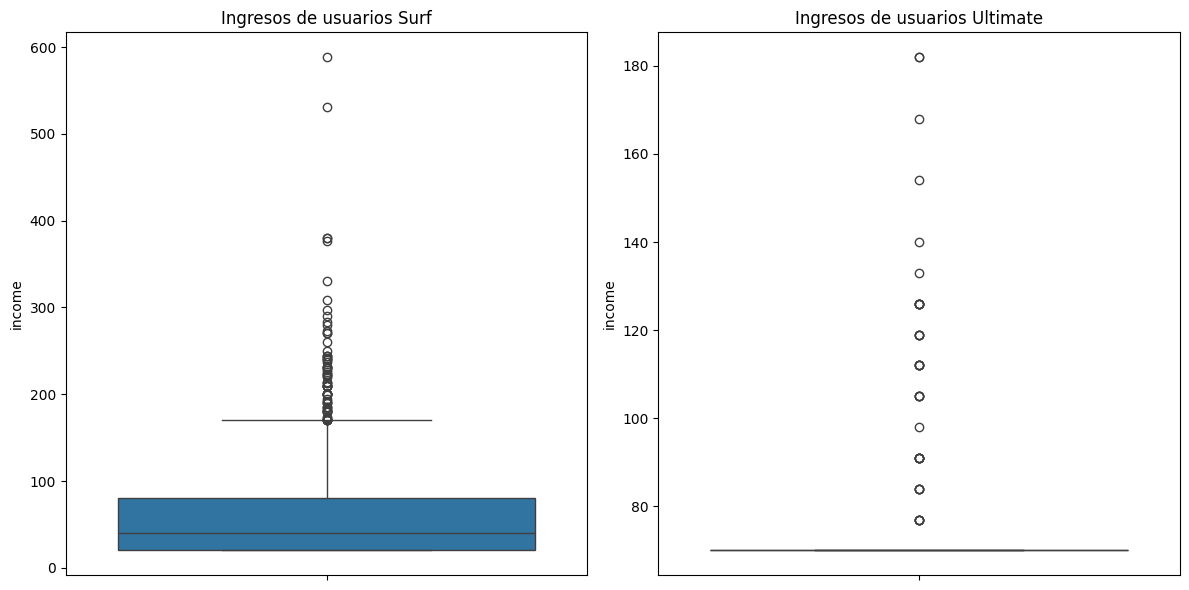

In [61]:
#Creamos la figura y sus ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de caja para 'Surf' en el primer subgráfico
sns.boxplot(data=df_surf, y='income', ax=axes[0])
axes[0].set_title('Ingresos de usuarios Surf')

# Gráfico de caja para 'Ultimate' en el segundo subgráfico
sns.boxplot(data=df_ultimate, y='income', ax=axes[1])
axes[1].set_title('Ingresos de usuarios Ultimate')

# Mostrar la figura
plt.tight_layout()
plt.show()

En términos de densidad o de ingreso por usuario, el plan ultimate genera mayores ingresos, sin embargo, en conjunto la cantidad de usuarios Surf representa ingresos mayores para la empresa, incluyendo las tarifas por exceso en minutos, mensajes e internet.

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [62]:
#Eliminamos los valores nulos y los eliminamos
gral_data = gral_data.dropna(subset=['income'])
df_surf = df_surf.dropna(subset=['income'])
df_ultimate = df_ultimate.dropna(subset=['income'])

In [63]:
# Prueba las hipótesis
gral_data.groupby('plan')['income'].mean()

plan
surf        60.331875
ultimate    72.313889
Name: income, dtype: float64

In [64]:
ttest_ind(
    df_surf["income"],
    df_ultimate["income"],
    equal_var = False)

TtestResult(statistic=-8.225558153987386, pvalue=3.626607306410092e-16, df=1842.8341339459482)

Rechazamos la hipótesis, no son iguales. Elegimos la prueba t Student ya que es la indicada para determinar si hay diferencias significativas entre dos grupos (ambas tarifas). Al promediar los ingresos de ambos planes, individualmente la tarifa ultimate genera mayores ingresos y el resultado de la prueba t indica que hay diferencia entre ambos planes, por lo que rechazamos la hipótesis.

Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [65]:

#aplicamos un filtro para obtener los sitios de interés
gral_data[gral_data["city"].str.contains("New York")]["city"].unique() 


array(['New York-Newark-Jersey City, NY-NJ-PA MSA'], dtype=object)

In [66]:
ny_nj_zones = ['New York-Newark-Jersey City, NY-NJ-PA MSA']

# Prueba las hipótesis
ttest_ind(
    gral_data[gral_data["city"].isin(ny_nj_zones)]["income"],
    gral_data[~gral_data["city"].isin(ny_nj_zones)]["income"],
    equal_var = False
)


TtestResult(statistic=-2.159412770548066, pvalue=0.031239256515302436, df=563.6638455638376)

Aceptamos la hipótesis. Al igual que en el caso anterior, la prueba t es la indicada para notar la diferencia entre ambos grupos, sin embargo, en este caso la significancia es positiva.

## Conclusión general



Podemos concluir que los usuarios tienen comportamientos similares en cuanto al consumo de los beneficios en sus planes.
Los usuarios de ambos planes consumen más minutos de llamadas en diciembre y pocos minutos en enero, su distribución es anormal positiva de acuerdo con las gráficas, en promedio consumen 404 - 406 minutos al mes.
En cuanto a los mensajes, el promedio de enviados por usuarios Surf es de 31 y por usuarios Ultimate 37. Igualmente la distribución es bastante similar en ambas tarifas.
El tráfico de datos la media sigue siendo mayor para los usuarios de Ultimate y la varianza mayor en los usuarios de Surf.
Concluimos que los usuarios de Ultimate generan más ganancias para la empresa por usuario al ser una tarifa mayor, sin embargo, los usuarios Surf aportan mayores ingresos por el volumen de usuarios y los cargos extras.
Contamos con dos hipótesis nulas; la primera es que los ingresos de ambos planes son iguales, esta hipótesis se rechaza ya que a pesar de tener comportamientos similares la prueba estadística nos permite ver que los ingresos por usuario son mayores en el plan Ultimate. Esto se verificó con la prueba t para analizar dos grupos. La segunda hipótesis es que los ingresos de usuarios de NY-NJ son diferentes a los usuarios de otras regiones, aceptamos la hipótesis de acuerdo al resultado de la prueba estadística.